# Python Intermediate: Project

* * * 


<div class="alert alert-success">  
    
### Learning Objectives 
    
* Apply the skills you have learned in this workshop series to a health dataset.
* Understand how to navigate file structures in Jupyter.
* Apply Pandas methods to concatenate dataframes, clean up data, count and group values, and visualize correlations. 
* Use your search engine to look up how functions and methods work.
    
</div>


### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!


### Sections
1. [🚀 Project](#project)
2. [Step 1: Import the Data](#data)
3. [Step 2: Data Cleaning](#clean)
4. [Step 3: Data Analysis](#eda)


<a id='project'></a>

# 🚀 Project

### Data: California Health Interview Survey
The [California Health Interview Survey (CHIS)](https://healthpolicy.ucla.edu/chis/Pages/default.aspx) is the nation's largest state health survey and a critical source of data on Californians as well as on the state's various racial and ethnic groups. The data has been altered for demonstration purposes.

The data has the following columns:

- `general_health`: Self-Reported assessment of general health
- `veg_perweek`: How many vegetables consumed per week
- `feel_left_out`: How often feeling left out
- `poverty_level`: Poverty level as Times of 100% Federal Poverty Line (FPL)
- `household_tenure`: Self-Reported household tenure
- `interview_language`: Language of interview

For this project, the goal we want to accomplish is **visualizing the relationship between poverty level and general health**. We will bring together basic programming and data science techniques you have learned to do this.

🔔 **Question**: Are there other research questions you could imagine asking with this dataset?

<a id='data'></a>

# Step 1: Importing Data 

Before we import our data, a few words on **filepaths**. 

A filepath is the location of a file on your system. There are two kinds of filepaths:

* **absolute**: The filepath from the top level folder of your system.
* **relative**: The filepath relative to the current working directory (i.e. this notebook's location). 

<img src="../images/filetree.png" alt="Absolute and relative filepaths" width="500"/>

## Using `listdir()`

When you are figuring out what filepath to use, you can use `os.listdir([PATH])` to list all subdirectories in a path. For example, let's see what directories are available to us in the current folder (noted with a dot `.`).

In [1]:
import os
os.listdir('.')

['1_Functions_and_Conditionals.ipynb',
 '2_Iteration_and_Visualization.ipynb',
 '3_Project.ipynb']

Looking up the items in the folder after moving up one level works like this:

In [2]:
os.listdir('../')

['.git', 'data', 'glossary.md', 'images', 'lessons', 'README.md', 'solutions']

💡 **Tip:** In Jupyter Lab's File Browser (the folder icon in top left of your screen),  you can navigate to a folder, right-click on a file and select `Copy Path` to get the absolute filepath of a file!

## Locating the Data

Try to locate the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Intermediate" folder. Using `pd.read_csv()`, read in all three data frames and assign them to the three variables defined below.

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

💡 **Tip**: As a reminder, here's how we loaded in data in the previous notebook:

```pd.read_csv('../data/gapminder-FiveYearData.csv')```

In [1]:
import pandas as pd 

# YOUR CODE HERE
df_eng = pd.read_csv('../data/chis_data/chis_eng.csv')
df_esp = pd.read_csv('../data/chis_data/chis_esp.csv')
df_other = pd.read_csv('../data/chis_data/chis_other.csv')


## Concatenating DataFrames

Look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the three DataFrames we have now. Save the concatenated list in a new variable called `df`.

In [7]:
# YOUR CODE HERE
df = pd.concat([df_eng,df_esp,df_other])
df

,general_health,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language
0,NaN,0,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
1,VERY GOOD,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH
2,VERY GOOD,20,NaN,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,ENGLISH
3,GOOD,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH
4,GOOD,6,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
...,...,...,...,...,...,...
368,GOOD,4,OFTEN,200-299% FPL,OWN,OTHER LANGUAGE
369,GOOD,2,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE
370,GOOD,10,NaN,200-299% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE
371,GOOD,7,HARDLY EVER,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the concatenated DataFrame?
2. How many numeric columns are there in the dataset?
3. What data type are the values in the `poverty_level` column?


In [10]:
# YOUR CODE HERE
df.dtypes

general_health        object
veg_perweek            int64
feel_left_out         object
poverty_level         object
household_tenure      object
interview_language    object
dtype: object

In [12]:
# Let's reset the index
df.reset_index(drop=True)
df

,general_health,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language
0,NaN,0,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
1,VERY GOOD,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH
2,VERY GOOD,20,NaN,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,ENGLISH
3,GOOD,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH
4,GOOD,6,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
...,...,...,...,...,...,...
368,GOOD,4,OFTEN,200-299% FPL,OWN,OTHER LANGUAGE
369,GOOD,2,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE
370,GOOD,10,NaN,200-299% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE
371,GOOD,7,HARDLY EVER,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE


<a id='clean'></a>

# Step 2: Data Cleaning

Often, we will want to remove some missing values in a DataFrame. Have a look at the `general_health` column and find the missing values using the `.isna()` method. Then, use `.sum()` to sum the amount of undefined (NaN) values.

In [14]:
# YOUR CODE HERE
df.isna().sum()

general_health         4898
veg_perweek               0
feel_left_out         13713
poverty_level             0
household_tenure          0
interview_language        0
dtype: int64

Get rid of the non-existent values in this column with the `.dropna()` method. Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to see how to do this.

💡 **Tip**: Use the `subset` argument to select a specific column to remove values from. 

In [23]:
# YOUR CODE HERE
df = df.dropna()



<a id='eda'></a>

# Step 3: Data Analysis

Now that we have preprocessed data, we want to analyze it. Recall that our goal is to visualize a relationship between poverty level and general health. Before we do this, we should get a better grasp of what is in our data.

## Counting Values
The first thing we will want to do is count values of poverty levels: we want to see how many levels there are, and how the data are distributed. First, run `value_counts()` on the `poverty_level` column. 

📝 **Poll - PyInt 3-1**: Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for `value_counts()`. What parameter can you use to normalize the output?


In [29]:
# YOUR CODE HERE
df['poverty_level'].value_counts() # Count value based on criteria

poverty_level
300% FPL AND ABOVE    4371
200-299% FPL          1032
100-199% FPL           982
0-99% FPL              484
Name: count, dtype: int64

## Creating a Function

It turns out that poverty is expressed "as Times of 100% Federal Poverty Line (FPL)".
For instance, `"100-199%" FPL"` means that the row's income was 1-1.99 times the FPL.
One approach to this statistic could be to see if we can find differences in general health for people **below and above the poverty line**. 

To do this, we can create a function that takes in values of the `poverty_level` column and outputs whether that value is above or below the poverty line.

1. Create a new function called `assign_level`. It takes one parameter, which we'll call `i`.
2. If `i` is `"0-99% FPL"`, return 0. In all other cases, return 1.

In [30]:
# YOUR CODE HERE
def assign_level(i):
    if i == "0-99% FPL":
        return 0
    else:
        return 1


## Applying a Function

Recall that we can use the `apply()` method in Pandas to apply our new function to the `poverty_level` column of our DataFrame. We also want to save the output of this `apply()` method to a new column in our DataFrame. 

1. Use the `apply()` method on the `poverty_level` column. Pass your `assign_level` function as the argument.
3. Save the result of this operation in a new column in your `df`, called `above_poverty_line`.

In [33]:
# YOUR CODE HERE
df['above_poverty_line'] = df['poverty_level'].apply(assign_level)
df

,general_health,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language,above_poverty_line
1,VERY GOOD,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH,1
3,GOOD,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH,1
5,FAIR,11,HARDLY EVER,300% FPL AND ABOVE,OWN,ENGLISH,1
7,GOOD,0,HARDLY EVER,200-299% FPL,OWN,ENGLISH,1
11,VERY GOOD,2,HARDLY EVER,300% FPL AND ABOVE,OWN,ENGLISH,1
...,...,...,...,...,...,...,...
365,FAIR,6,SOME OF THE TIME,300% FPL AND ABOVE,OWN,OTHER LANGUAGE,1
366,FAIR,5,HARDLY EVER,0-99% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE,0
368,GOOD,4,OFTEN,200-299% FPL,OWN,OTHER LANGUAGE,1
371,GOOD,7,HARDLY EVER,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE,1


## Subsetting a DataFrame

In order to create two bar plots of general health – for people above and below the poverty line – we can create two DataFrames for just these groups. We can then plot the values in these DataFrames "on top of" one another in a barplot.

Recall that we can subset DataFrames with Boolean masks. For instance, say we have a DataFrame `counts` with a column `A`. If we want to create a new DataFrame called `above_800`, which only contains the values over 800 in column `A` of `counts`, we would write:

```
above_800 = counts[counts['A'] > 800]
```

Let's perform the same operation on our data.

1. Create a new DataFrame, `df_below`. It will be a subset of our `df`, based on the condition that the value in `above_poverty_line` is 0.
2. Create a new DataFrame, `df_above`. It will be a subset of our `df`, based on the condition that the value in `above_poverty_line` is 1.

In [35]:
# YOUR CODE HERE
df_below = df[df['above_poverty_line'] == 0]
df_above = df[df['above_poverty_line'] == 1]


,general_health,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language,above_poverty_line
1,VERY GOOD,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH,1
3,GOOD,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH,1
5,FAIR,11,HARDLY EVER,300% FPL AND ABOVE,OWN,ENGLISH,1
7,GOOD,0,HARDLY EVER,200-299% FPL,OWN,ENGLISH,1
11,VERY GOOD,2,HARDLY EVER,300% FPL AND ABOVE,OWN,ENGLISH,1
...,...,...,...,...,...,...,...
358,FAIR,0,OFTEN,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE,1
365,FAIR,6,SOME OF THE TIME,300% FPL AND ABOVE,OWN,OTHER LANGUAGE,1
368,GOOD,4,OFTEN,200-299% FPL,OWN,OTHER LANGUAGE,1
371,GOOD,7,HARDLY EVER,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,OTHER LANGUAGE,1


## Creating the Visualization

Finally, let's create our bar plots. We will create 2 plots in 1 cell, which will be plotted on top of one another. 

Fill in the blanks below, following the steps. 

1. Run a **normalized** `value_counts()` on the `general_health` column of `df_above` and `df_below`.
2. We are running `plot()` on the output of the resulting DataFrame. Enter the values for two arguments: `kind` must be set to `bar`, and `alpha` must be set to `.5`.


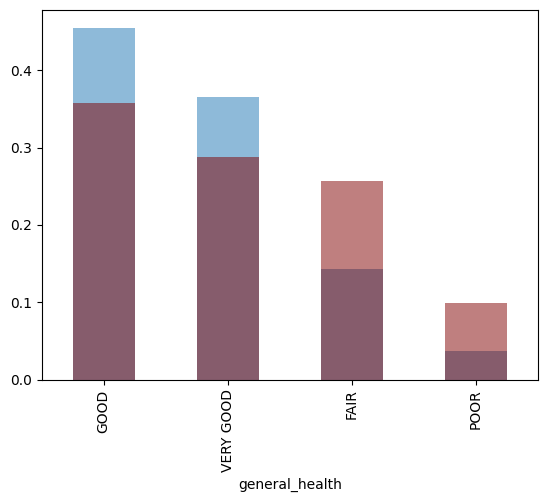

In [48]:
# YOUR CODE HERE
df_above['general_health'].value_counts(normalize=1).plot(kind='bar', alpha=0.5);
df_below['general_health'].value_counts(normalize=1).plot(kind='bar', alpha=0.5,color='maroon');

📝 **Poll - PyInt 3-2**:What is the `alpha` parameter doing? Read through the [documentation](https://pandas.pydata.org/docs/user_guide/visualization.html) to find out.</span>

# 🎉 Well Done!

Today's project took us through a data science workflow in Python:

- Importing multiple .csv files
- Exploratory Data Analysis
- Basic visualization

### 💡 Tip: More Workshops!

D-Lab teaches workshops that allow you to practice more with DataFrames and visualization.

- To learn more about Pandas and data wrangling, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).
- To learn more about data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).

<div class="alert alert-success">

## ❗ Key Points

* File structures can be navigated using absolute and relative file paths.
* The `.dropna()` method in Pandas removes missing values from a `DataFrame` or `Series`.
* Custom Functions can be applied to the axis of a DataFrame using `apply()`.
* Subsetting DataFrames based on some condition can help with creating comparative visualizations.    

</div>